## Data Loading and Preprocessing

In [15]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/content/donateacrycorpus_features.csv")

In [11]:
labels = data['Cry_Audio_File'].values
audios = data.drop('Cry_Audio_File', axis=1).values

In [12]:
labels = [label.split("/")[1] for label in labels]

In [18]:
lbl = []
for label in labels:
  if label == 'belly_pain':
    lbl.append(0)
  elif label == 'burping':
    lbl.append(1)
  elif label == 'discomfort':
    lbl.append(2)
  elif label == 'hungry':
    lbl.append(3)
  elif label == 'tired':
    lbl.append(4)

In [19]:
from tensorflow.keras.utils import to_categorical
targets = to_categorical(lbl)

In [20]:
from sklearn.model_selection import train_test_split
audios_train, audios_test, targets_train, targets_test = train_test_split(audios, targets, test_size=0.2, random_state=42)

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
audios_train_scaled = scaler.fit_transform(audios_train)
audios_test_scaled = scaler.transform(audios_test)

In [23]:
targets_train.shape

(365, 5)

## Model

In [22]:
import tensorflow as tf

In [30]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Reshape((audios_train_scaled.shape[1], 1), input_shape=(audios_train_scaled.shape[1],)))
model.add(tf.keras.layers.Conv1D(32, 3, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling1D(2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 26, 1)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 32)            128       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 13, 32)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 416)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               53376     
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                      

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
history = model.fit(audios_train_scaled, targets_train, epochs=100, batch_size=32, validation_data=(audios_test_scaled, targets_test))

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 1.0763 - accuracy: 0.7863 - val_loss: 0.8433 - val_accuracy: 0.7826
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6625 - accuracy: 0.8493 - val_loss: 0.9690 - val_accuracy: 0.7826
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6470 - accuracy: 0.8493 - val_loss: 0.8596 - val_accuracy: 0.7826
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6257 - accuracy: 0.8493 - val_loss: 0.8312 - val_accuracy: 0.7826
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6135 - accuracy: 0.8493 - val_loss: 0.8437 - val_accuracy: 0.7826
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6060 - accuracy: 0.8493 - val_loss: 0.8403 - val_accuracy: 0.7826
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5972 - accuracy: 0.8493 - val_loss: 0.8190 - val_accuracy: 0.7826
Epoch 8/100


## Charts

In [34]:
import matplotlib.pyplot as plt

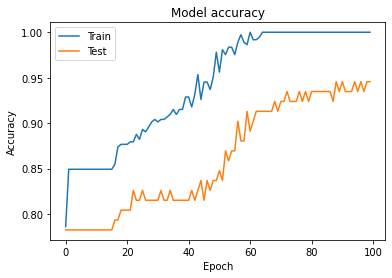

In [35]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

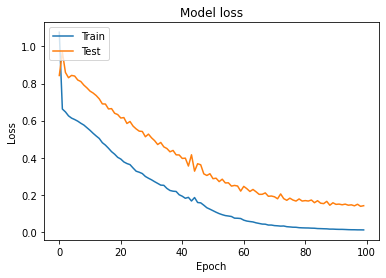

In [36]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##Evaluation

In [42]:
outs = ['belly_pain', 'burping', 'discomfort', 'hungry', 'tired']

In [45]:
preds = model.predict(audios_test_scaled)

3/3 [==============================] - 0s 4ms/step


In [46]:
preds = [np.argmax(pred) for pred in preds]

In [49]:
reals = [np.argmax(tg) for tg in targets_test]

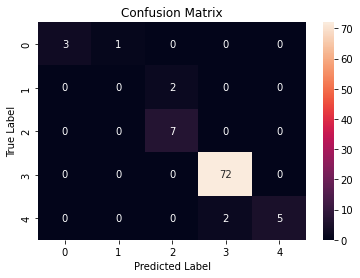

In [52]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

conf_matrix = confusion_matrix(reals, preds)

sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# THE END